In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
netflix=pd.read_csv('netflix_titles.csv')

In [110]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [111]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [112]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [113]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [114]:
netflix.isnull().sum()/len(netflix)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [115]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [116]:
#data cleaning
netflix["director"].fillna(netflix["director"].mode()[0], inplace=True)
netflix["cast"].fillna(netflix["cast"].mode()[0], inplace=True)
netflix["country"].fillna(netflix["country"].mode()[0], inplace=True)
netflix['date_added'].fillna(netflix['date_added'].mode()[0],inplace=True)

In [117]:
netflix.dropna(subset= ["rating", "duration"], inplace=True)

In [118]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [119]:
netflix.value_counts('type')

type
Movie      6126
TV Show    2674
Name: count, dtype: int64

In [120]:
#TO CHECK IF THERE IS ANY DUPLICATE ENTRY 
netflix.duplicated().sum()

0

In [121]:
netflix['added_month'] = netflix['date_added'].apply(lambda x:x.split(',')[0].split()[0])
netflix['added_year'] = netflix['date_added'].apply(lambda x:x.split(',')[1])
netflix[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [122]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [123]:
#Checking the data shape
print(f'This dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns now')

This dataset contains 8800 rows and 14 columns now


<Axes: xlabel='type', ylabel='count'>

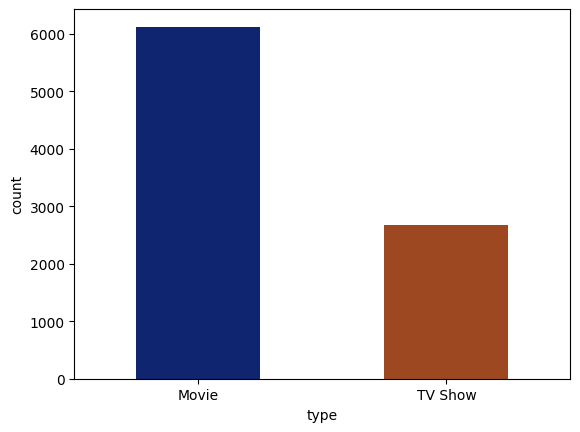

In [124]:
sns.countplot(x = netflix['type'],width=0.5,palette='dark')

In [125]:
country_counts = netflix['country'].value_counts()
country_counts

country
United States                             3645
India                                      972
United Kingdom                             419
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

<Axes: xlabel='country', ylabel='count'>

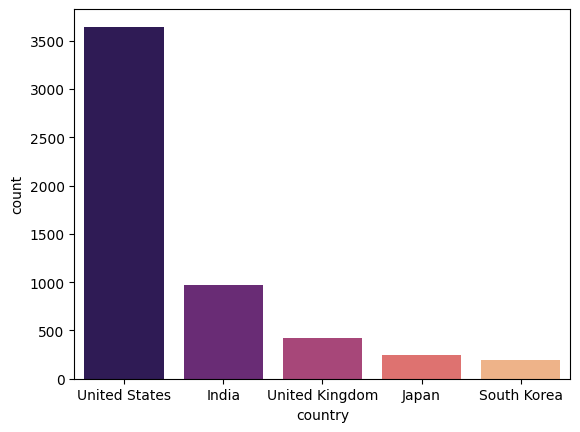

In [126]:
top_countries = country_counts.nlargest(5)
top_countries
sns.countplot(x  = netflix['country'], order = top_countries.index,palette='magma')

In [127]:
netflix['added_year'].nunique()

14

In [128]:
netflix['added_year'].value_counts()

added_year
2019    2016
2020    1889
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

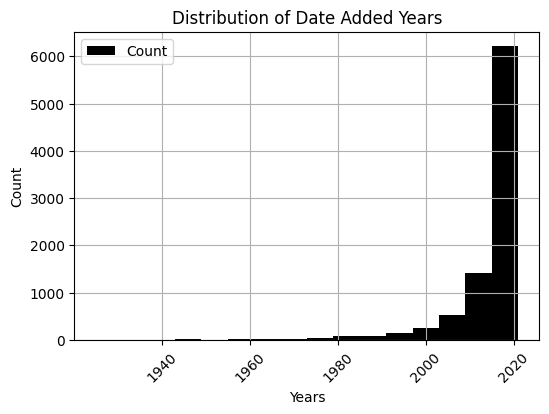

In [141]:
plt.figure(figsize=(6,4))
plt.hist(netflix['release_year'], bins=16, label='Count', color='black' )
plt.grid(True)
plt.title('Distribution of Date Added Years')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Axes: xlabel='added_year', ylabel='count'>

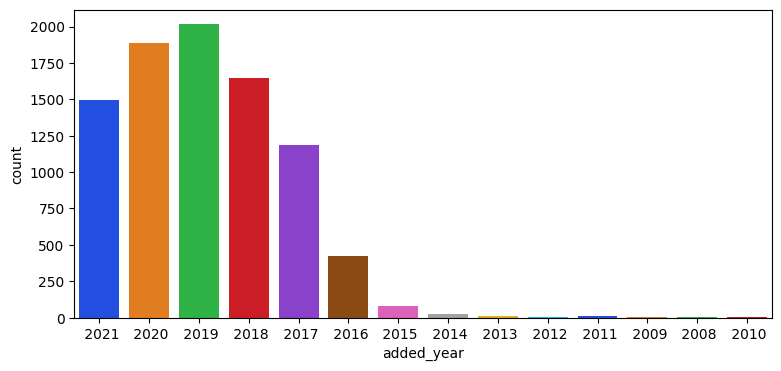

In [130]:
plt.figure(figsize=(9,4))
sns.countplot(x = netflix['added_year'],palette='bright')

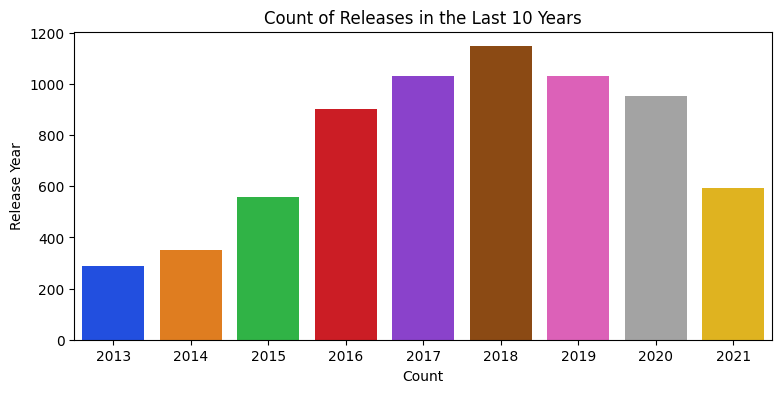

In [142]:
# Plotting for the last 10 years
current_year = 2024
plt.figure(figsize=(9,4))
sns.countplot(x='release_year', data=netflix[netflix['release_year'] >= current_year - 11], order=sorted(netflix[netflix['release_year'] >= current_year - 11]['release_year'].unique()), palette='bright')
plt.title('Count of Releases in the Last 10 Years')
plt.xlabel('Count')
plt.ylabel('Release Year')
plt.show()


In [132]:
netflix['added_month'].value_counts()

added_month
July         827
December     812
September    769
April        763
October      760
August       754
January      747
March        741
June         728
November     705
May          632
February     562
Name: count, dtype: int64

<Axes: xlabel='added_month', ylabel='count'>

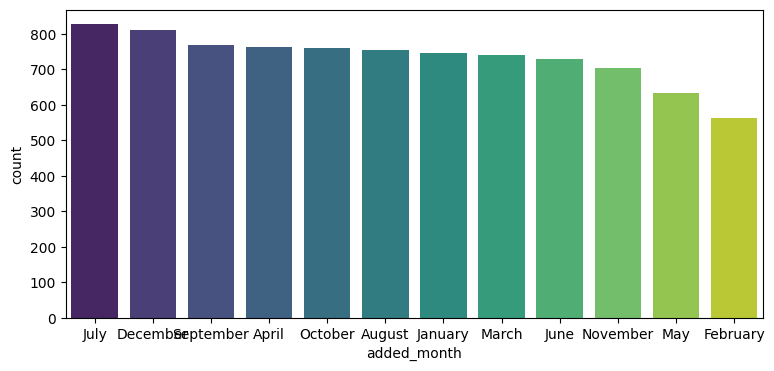

In [143]:
plt.figure(figsize=(9,4))
sns.countplot(x = netflix['added_month'],palette='viridis',order=netflix['added_month'].value_counts().index[0:])

In [134]:
netflix['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='rating'>

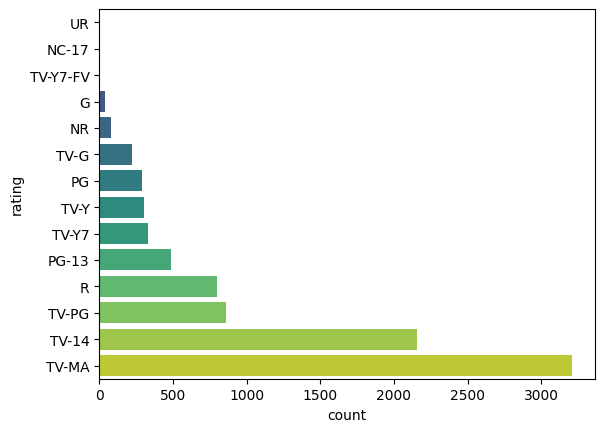

In [135]:
sns.countplot(y=netflix['rating'],order=netflix['rating'].value_counts().index[::-1],palette='viridis')

<Axes: xlabel='country', ylabel='count'>

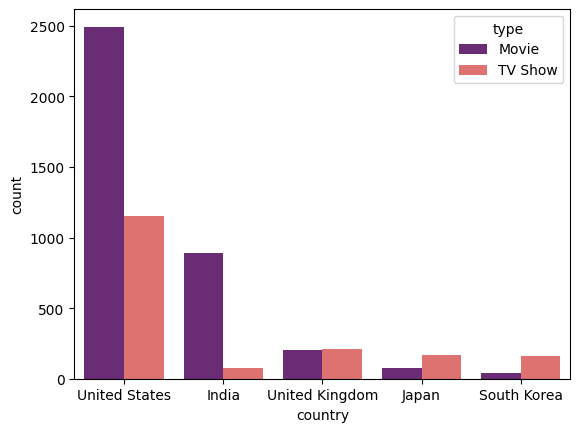

In [136]:
sns.countplot(x = netflix['country'], order = top_countries.index, hue = netflix['type'],palette='magma')

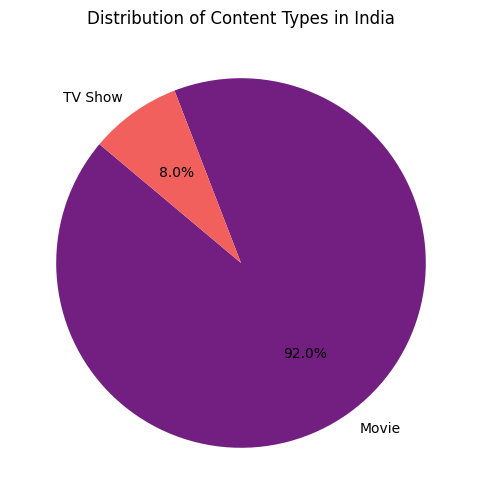

In [144]:
# Filter for content produced in India
df_india = netflix[netflix['country'].str.contains('India', na=False)]

# Count the occurrences of each type in the Indian content
type_counts_india = df_india['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6,6))
type_counts_india.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('magma', len(type_counts_india)), startangle=140)
plt.title('Distribution of Content Types in India')
plt.ylabel('')  # To remove the y-label
plt.show()
